<a href="https://colab.research.google.com/github/arjun-subramaniyan/healthcare-ml/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

## Data mining 

In [2]:
df= pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#To understand no of rows and columns
print("The no of patients present in this database is " + str(df.shape[0]))
print("The no of attributes for each patient in this database is " + str(df.shape[1]))

The no of patients present in this database is 303
The no of attributes for each patient in this database is 14


###Variables descriptions
age: The person’s age in years

sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment-

0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia Value 
0: NULL (dropped from the dataset previously)

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target: Heart disease (1 = no, 0= yes)**

## Data visualisation

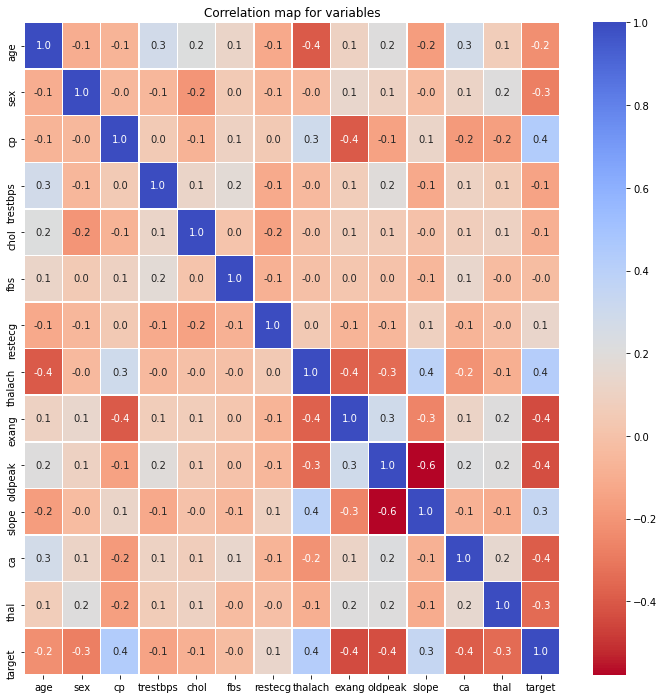

In [3]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="coolwarm_r")

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


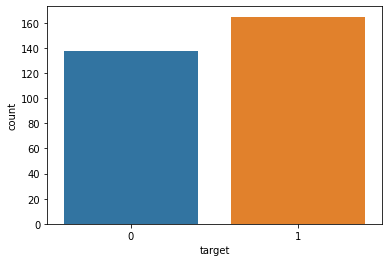

In [5]:
sns.countplot(df['target']) # there is a balance of both normal and diseased subjects

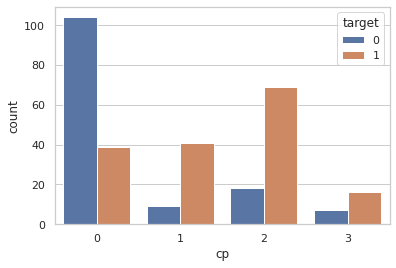

In [13]:
sns.set(style="whitegrid")
sns.countplot(data=df, x = 'cp', hue='target')

From this graph we can understand that there are 100+ patients with no chest pain and no heart disease,

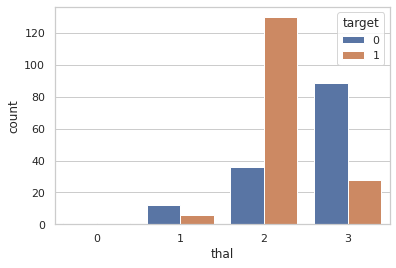

In [6]:
sns.set(style="whitegrid")
sns.countplot(data=df, x = 'thal', hue='target')

Many subjects despite having reported with normal blood flow have heart disease

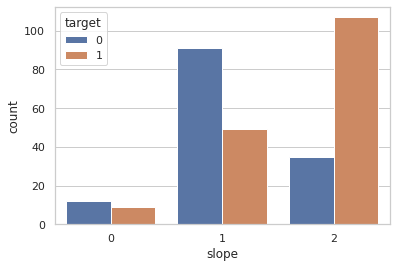

In [8]:
sns.set(style="whitegrid")
sns.countplot(data=df, x = 'slope', hue='target')

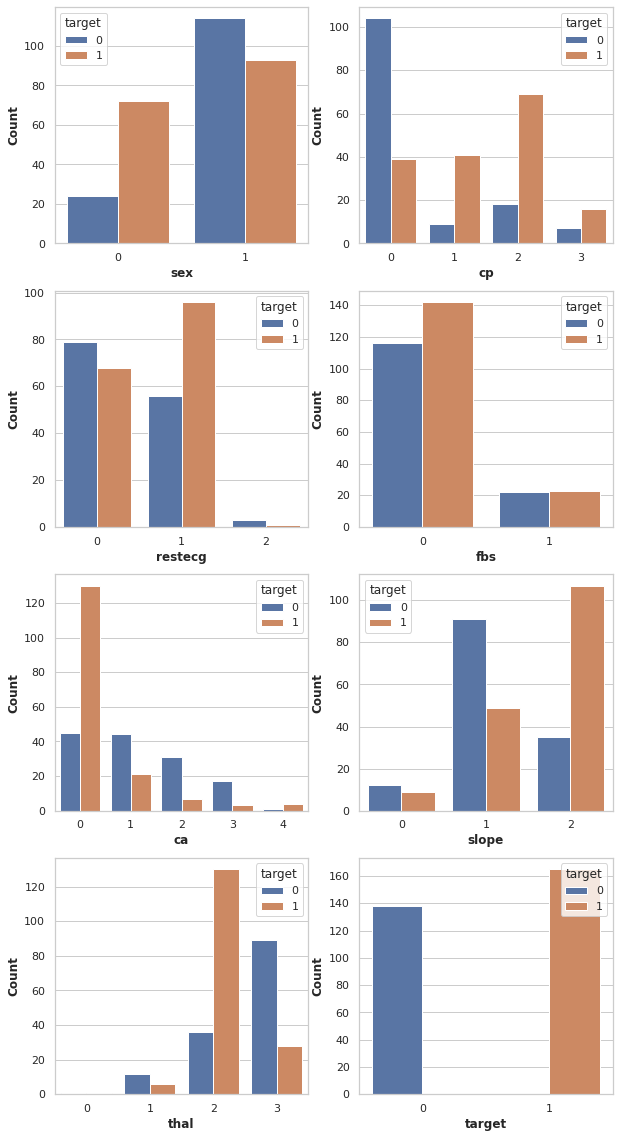

In [46]:
df_ht = ['sex','cp','restecg','fbs','ca','slope','thal', 'target']

fig, axs = plt.subplots(4, 2, figsize=(10,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_ht):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['target'])
    #plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

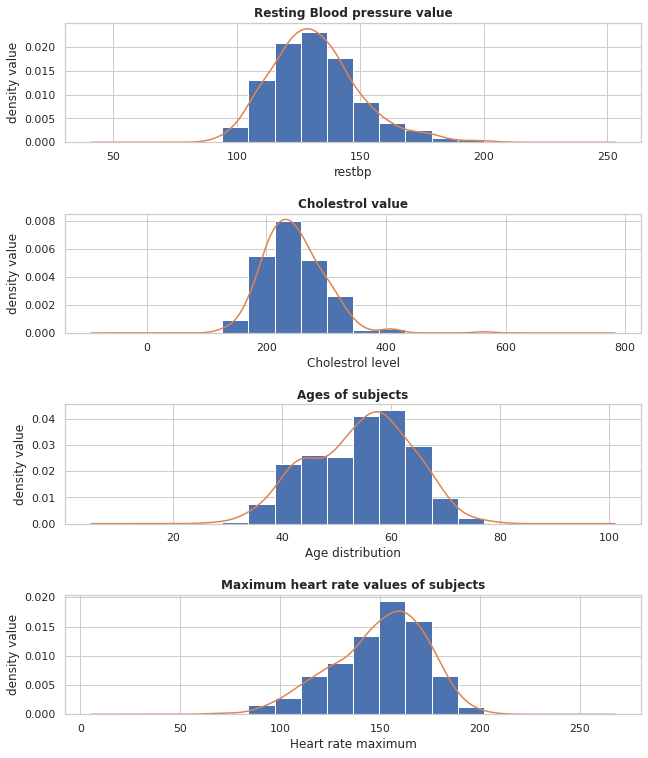

In [58]:
plt.figure(figsize=(10,12))

plt.subplot(4,1,1)
df['trestbps'].plot(kind='hist',density=True)
df['trestbps'].plot(kind='density')
plt.xlabel('restbp')
plt.ylabel('density value')
plt.title('Resting Blood pressure value',weight='bold')
plt.subplot(4,1,2)
df['chol'].plot(kind='hist',density=True)
df['chol'].plot(kind='density')
plt.xlabel('Cholestrol level')
plt.ylabel('density value')
plt.title('Cholestrol value',weight='bold')
plt.subplot(4,1,3)
df['age'].plot(kind='hist',density=True)
df['age'].plot(kind='density')
plt.xlabel('Age distribution')
plt.ylabel('density value')
plt.title('Ages of subjects',weight='bold')
plt.subplot(4,1,4)
df['thalach'].plot(kind='hist',density=True)
df['thalach'].plot(kind='density')
plt.xlabel('Heart rate maximum')
plt.ylabel('density value')
plt.title('Maximum heart rate values of subjects',weight='bold')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

                  
plt.show()

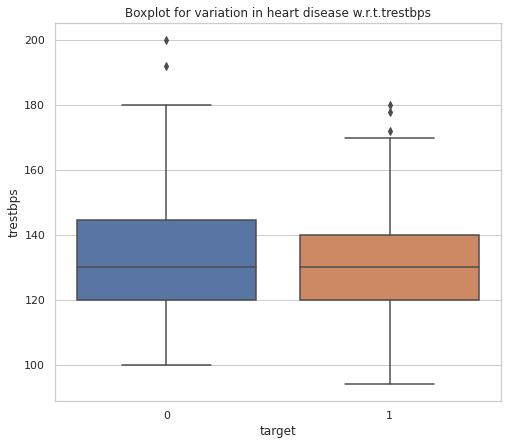

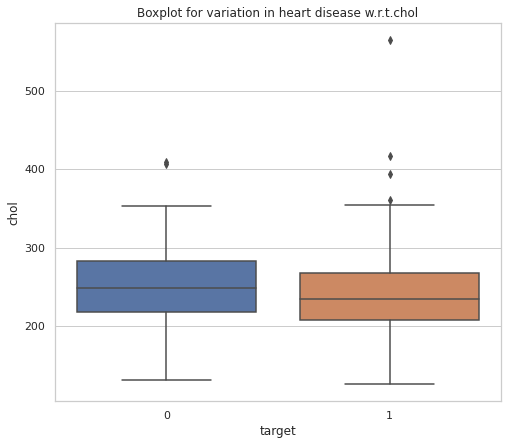

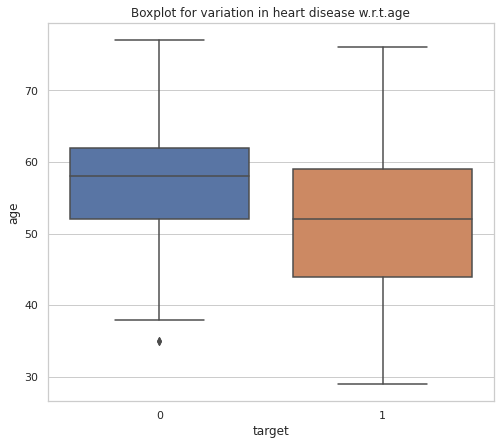

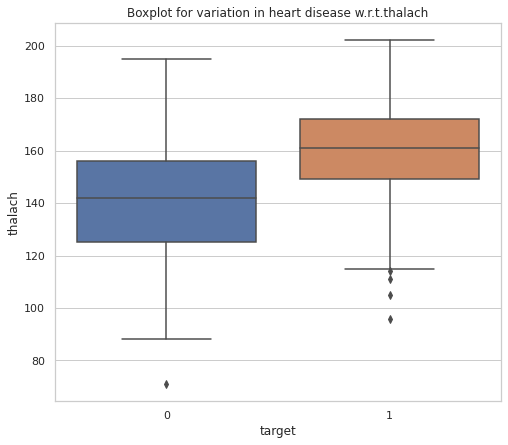

In [61]:


g3=['trestbps','chol','age','thalach']
for index,i in enumerate(g3):
  plt.figure(figsize=(8,32))
  plt.subplot(len(g3),1,index+1)
  sns.boxplot(x=df["target"],y=df[i])
  plt.title("Boxplot for variation in heart disease w.r.t."+ i)
  plt.show()

Clearly we can understand that a single continuous datapoint does not show a clear difference in the presence of heart disease

Fortunately there are not any evident errors that can be seen both from the bar charts and from the box plots as there are very few outliers in the data that need to be looked into and it would be better not to treat those few outliers as they may represent the exceptions in population

## Data splitting for heart disease detection

In [123]:
#Defining X and y
X = df.iloc[:,:-1]
y = df['target']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (242, 13)
y_train: (242,)
X_test: (61, 13)
y_test: (61,)


## Model build

Logistic regression

The accuracy of the logistic regression model is 88.52


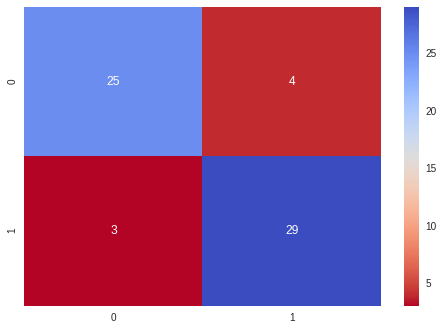

In [174]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_lg = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the logistic regression model is {}".format(acc_lg))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

KNN

The accuracy of the KNN with 3 neighbours model is 72.13


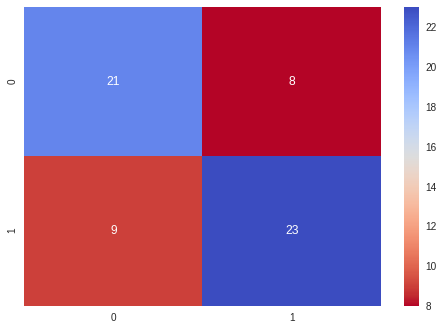

In [168]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_knn = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the KNN with 3 neighbours model is {}".format(acc_knn))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

Decision Tree

The accuracy of the decision tree is 83.61


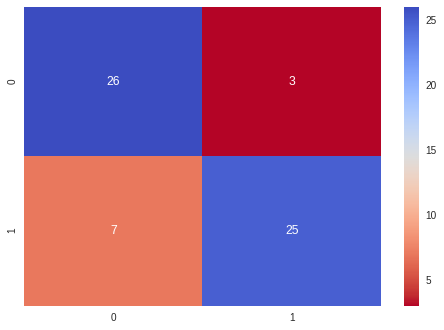

In [166]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the decision tree is {}".format(acc_dt))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

Bagging Random Forest

The accuracy of the random forest is 85.25


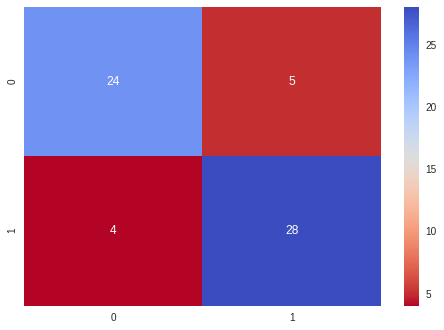

In [165]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the random forest is {}".format(acc_rf))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

The accuracy of the extreme gradient boost is 81.97


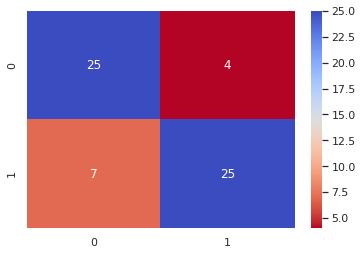

In [100]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=8).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_xg = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the extreme gradient boost is {}".format(acc_xg))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

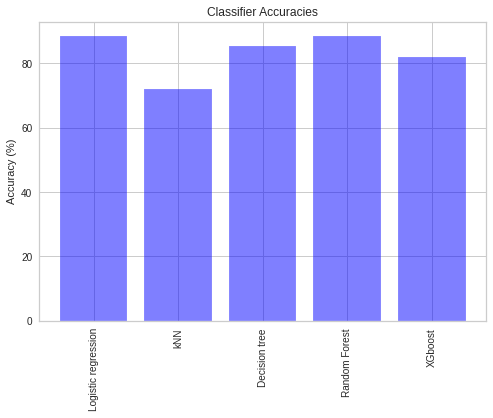

In [164]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Logistic regression','kNN','Decision tree','Random Forest','XGboost')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_lg, acc_knn, acc_dt,acc_rf, acc_xg]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

## Model Evaluation

Logistic Regression, Random Forest and Decision trees have reported the highest accuracies, further analyse them

In [155]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(max_depth=8,random_state=42)
rfarray=cross_val_score(rf,X,y,cv=5)
print(rfarray)
print("The mean accuracy value for 5 folds {}".format(round(np.mean(rfarray)*100,2)))

[0.83606557 0.86885246 0.86885246 0.81666667 0.76666667]
The mean accuracy value for 5 folds 83.14


In [153]:
lg=LogisticRegression(random_state=42)
lgarray=cross_val_score(lg,X,y,cv=5)
print(lgarray)
print("The mean accuracy value for 5 folds {}".format(round(np.mean(lgarray)*100,2)))

[0.81967213 0.86885246 0.81967213 0.85       0.75      ]
The mean accuracy value for 5 folds 82.16


In [176]:
dt=DecisionTreeClassifier(max_depth=10,random_state=42)
rfarray=cross_val_score(dt,X,y,cv=5)
print(rfarray)
print("The mean accuracy value for 5 folds {}".format(round(np.mean(rfarray)*100,2)))

[0.75409836 0.85245902 0.75409836 0.7        0.71666667]
The mean accuracy value for 5 folds 75.55


Clearly the best results are seen from Logistic regression and Random forest

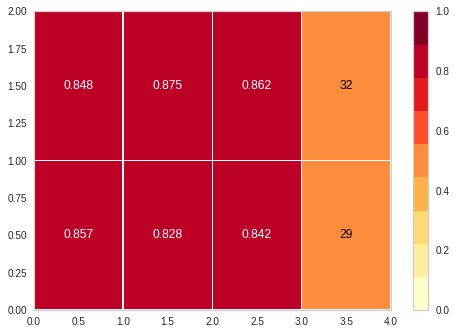

In [156]:
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
model = RandomForestClassifier(max_depth=8,random_state=42)
visualizer = ClassificationReport(model, classes=['Normal','Diseased'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
plt.show()  

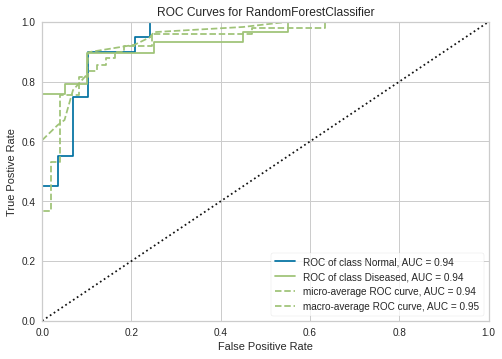

In [161]:
from yellowbrick.classifier.rocauc import roc_auc

roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal','Diseased'])

##Chest pain level trial

In [178]:
dfc=df.drop(columns=['cp','target'])

In [179]:
X=dfc
y=df['cp']
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y, # stratify because there is an imbalance
                                                      random_state=42) # 80-20 split

The accuracy of the trained model is 52.46


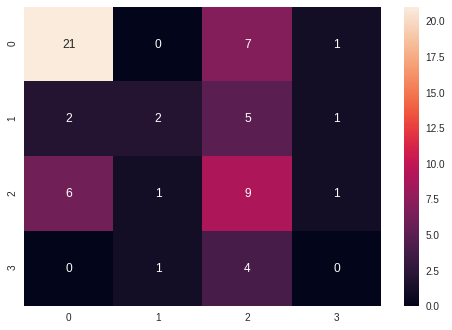

In [180]:


clf = XGBClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = round(clf.score(X_test,y_test) * 100, 2)
print("The accuracy of the trained model is {}".format(acc))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True)